<img src="https://webna.ir/wp-content/uploads/2018/08/%D9%85%DA%A9%D8%AA%D8%A8-%D8%AE%D9%88%D9%86%D9%87.png" width=50% />

<div class="alert alert-block alert-success">
    <h1 align="center">Machine Learning in Python</h1>
    <h3 align="center">Mini Project2 - Bike Sharing</h3>
</div>

<img src = "https://storage.googleapis.com/kaggle-competitions/kaggle/3948/media/bikes.png" width=80%>

## Importing the libraries

In [1]:
import numpy as np

In [2]:
np.__version__

'1.20.3'

In [3]:
import pandas as pd

In [4]:
pd.__version__

'1.3.4'

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

In [6]:
import seaborn as sns

In [7]:
sns.__version__

'0.11.2'

In [8]:
import sklearn

In [9]:
sklearn.__version__

'0.24.2'

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
from sklearn.preprocessing import PolynomialFeatures

In [12]:
from sklearn.linear_model import LogisticRegression

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
from sklearn import metrics

## Load and Prepare Data

In [15]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [16]:
type(train)

pandas.core.frame.DataFrame

In [17]:
len(train)

10886

In [18]:
len(test)

6493

## EDA

In [19]:
train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1/1/2011 0:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,1/1/2011 1:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,1/1/2011 2:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,1/1/2011 3:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,1/1/2011 4:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,12/19/2012 19:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,12/19/2012 20:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,12/19/2012 21:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,12/19/2012 22:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [20]:
len(train)

10886

In [21]:
train.shape

(10886, 12)

In [22]:
train.sample(10)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
3939,9/15/2011 4:00,3,0,1,1,24.60,28.790,78,7.0015,2,5,7
8528,7/16/2012 17:00,3,0,1,3,31.16,36.365,66,39.0007,86,669,755
8033,6/15/2012 2:00,2,0,1,1,22.96,26.515,83,7.0015,0,15,15
2182,5/17/2011 20:00,2,0,1,1,23.78,27.275,83,27.9993,30,253,283
5207,12/11/2011 1:00,4,0,0,1,6.56,7.575,59,15.0013,8,54,62
2645,6/18/2011 3:00,2,0,0,1,24.60,27.275,88,6.0032,4,16,20
8271,7/6/2012 0:00,3,0,1,1,31.98,37.120,62,8.9981,39,63,102
9364,9/13/2012 13:00,3,0,1,1,28.70,31.820,42,0.0000,60,223,283
258,1/12/2011 5:00,1,0,1,1,5.74,7.575,86,11.0014,0,5,5
912,3/2/2011 11:00,1,0,1,1,13.94,15.150,53,22.0028,8,65,73


In [23]:
train.head(10)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1/1/2011 0:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,1/1/2011 1:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,1/1/2011 2:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,1/1/2011 3:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,1/1/2011 4:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
5,1/1/2011 5:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1
6,1/1/2011 6:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2
7,1/1/2011 7:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3
8,1/1/2011 8:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8
9,1/1/2011 9:00,1,0,0,1,13.12,17.425,76,0.0000,8,6,14


In [24]:
train.tail(10)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
10876,12/19/2012 14:00,4,0,1,1,17.22,21.210,50,12.9980,33,185,218
10877,12/19/2012 15:00,4,0,1,1,17.22,21.210,50,19.0012,28,209,237
10878,12/19/2012 16:00,4,0,1,1,17.22,21.210,50,23.9994,37,297,334
10879,12/19/2012 17:00,4,0,1,1,16.40,20.455,50,26.0027,26,536,562
10880,12/19/2012 18:00,4,0,1,1,15.58,19.695,50,23.9994,23,546,569
10881,12/19/2012 19:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,12/19/2012 20:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,12/19/2012 21:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,12/19/2012 22:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129
10885,12/19/2012 23:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88


In [25]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [26]:
train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [27]:
train.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [28]:
train["datetime"].value_counts()

1/1/2011 0:00       1
5/1/2012 21:00      1
5/1/2012 13:00      1
5/1/2012 14:00      1
5/1/2012 15:00      1
                   ..
9/2/2011 4:00       1
9/2/2011 5:00       1
9/2/2011 6:00       1
9/2/2011 7:00       1
12/19/2012 23:00    1
Name: datetime, Length: 10886, dtype: int64

In [29]:
len(train["datetime"].value_counts())

10886

In [30]:
train["season"].value_counts()

4    2734
2    2733
3    2733
1    2686
Name: season, dtype: int64

In [31]:
train["season"].value_counts(normalize=True)*100

4    25.114826
2    25.105640
3    25.105640
1    24.673893
Name: season, dtype: float64

In [32]:
len(train["season"].value_counts())

4

In [33]:
train["holiday"].value_counts()

0    10575
1      311
Name: holiday, dtype: int64

In [34]:
len(train["holiday"].value_counts())

2

In [35]:
train["workingday"].value_counts()

1    7412
0    3474
Name: workingday, dtype: int64

In [36]:
train["workingday"].value_counts(normalize=True)*100

1    68.087452
0    31.912548
Name: workingday, dtype: float64

In [37]:
len(train["workingday"].value_counts())

2

In [38]:
train["weather"].value_counts()

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

In [39]:
train["weather"].value_counts(normalize=True)*100

1    66.066507
2    26.033437
3     7.890869
4     0.009186
Name: weather, dtype: float64

In [40]:
len(train["weather"].value_counts())

4

In [41]:
train["temp"].value_counts()

14.76    467
26.24    453
28.70    427
13.94    413
18.86    406
22.14    403
25.42    403
16.40    400
22.96    395
27.06    394
24.60    390
12.30    385
21.32    362
17.22    356
13.12    356
29.52    353
10.66    332
18.04    328
20.50    327
30.34    299
9.84     294
15.58    255
9.02     248
31.16    242
8.20     229
27.88    224
23.78    203
32.80    202
11.48    181
19.68    170
6.56     146
33.62    130
5.74     107
7.38     106
31.98     98
34.44     80
35.26     76
4.92      60
36.90     46
4.10      44
37.72     34
36.08     23
3.28      11
0.82       7
38.54      7
39.36      6
2.46       5
1.64       2
41.00      1
Name: temp, dtype: int64

In [42]:
len(train["temp"].value_counts())

49

In [43]:
train["atemp"].value_counts()

31.060    671
25.760    423
22.725    406
20.455    400
26.515    395
16.665    381
25.000    365
33.335    364
21.210    356
30.305    350
15.150    338
21.970    328
24.240    327
17.425    314
31.820    299
34.850    283
27.275    282
32.575    272
11.365    271
14.395    269
29.545    257
19.695    255
15.910    254
12.880    247
13.635    237
34.090    224
12.120    195
28.790    175
23.485    170
10.605    166
35.605    159
9.850     127
18.180    123
36.365    123
37.120    118
9.090     107
37.880     97
28.030     80
7.575      75
38.635     74
6.060      73
39.395     67
6.820      63
8.335      63
18.940     45
40.150     45
40.910     39
5.305      25
42.425     24
41.665     23
3.790      16
4.545      11
3.030       7
43.940      7
2.275       7
43.180      7
44.695      3
0.760       2
1.515       1
45.455      1
Name: atemp, dtype: int64

In [44]:
len(train["atemp"].value_counts())

60

In [45]:
train["humidity"].value_counts()

88    368
94    324
83    316
87    289
70    259
     ... 
8       1
10      1
97      1
96      1
91      1
Name: humidity, Length: 89, dtype: int64

In [46]:
len(train["humidity"].value_counts())

89

In [47]:
train["windspeed"].value_counts()

0.0000     1313
8.9981     1120
11.0014    1057
12.9980    1042
7.0015     1034
15.0013     961
6.0032      872
16.9979     824
19.0012     676
19.9995     492
22.0028     372
23.9994     274
26.0027     235
27.9993     187
30.0026     111
31.0009      89
32.9975      80
35.0008      58
39.0007      27
36.9974      22
43.0006      12
40.9973      11
43.9989       8
46.0022       3
56.9969       2
47.9988       2
51.9987       1
50.0021       1
Name: windspeed, dtype: int64

In [48]:
train["windspeed"].value_counts(normalize=True)*100

0.0000     12.061363
8.9981     10.288444
11.0014     9.709719
12.9980     9.571927
7.0015      9.498438
15.0013     8.827852
6.0032      8.010288
16.9979     7.569355
19.0012     6.209811
19.9995     4.519566
22.0028     3.417233
23.9994     2.516994
26.0027     2.158736
27.9993     1.717803
30.0026     1.019658
31.0009     0.817564
32.9975     0.734889
35.0008     0.532794
39.0007     0.248025
36.9974     0.202094
43.0006     0.110233
40.9973     0.101047
43.9989     0.073489
46.0022     0.027558
56.9969     0.018372
47.9988     0.018372
51.9987     0.009186
50.0021     0.009186
Name: windspeed, dtype: float64

In [49]:
len(train["windspeed"].value_counts())

28

In [50]:
train["casual"].value_counts()

0      986
1      667
2      487
3      438
4      354
      ... 
332      1
361      1
356      1
331      1
304      1
Name: casual, Length: 309, dtype: int64

In [51]:
len(train["casual"].value_counts())

309

In [52]:
train["registered"].value_counts()

3      195
4      190
5      177
6      155
2      150
      ... 
570      1
422      1
678      1
565      1
636      1
Name: registered, Length: 731, dtype: int64

In [53]:
len(train["registered"].value_counts())

731

In [54]:
train["count"].value_counts()

5      169
4      149
3      144
6      135
2      132
      ... 
801      1
629      1
825      1
589      1
636      1
Name: count, Length: 822, dtype: int64

In [55]:
len(train["count"].value_counts())

822

In [56]:
train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1/1/2011 0:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,1/1/2011 1:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,1/1/2011 2:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,1/1/2011 3:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,1/1/2011 4:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,12/19/2012 19:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,12/19/2012 20:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,12/19/2012 21:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,12/19/2012 22:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [57]:
holiday_train = train[train["holiday"]==1]
holiday_train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
372,1/17/2011 0:00,1,1,0,2,8.20,9.850,47,15.0013,1,16,17
373,1/17/2011 1:00,1,1,0,2,8.20,9.850,44,12.9980,1,15,16
374,1/17/2011 2:00,1,1,0,2,7.38,8.335,43,16.9979,0,8,8
375,1/17/2011 3:00,1,1,0,2,7.38,9.090,43,12.9980,0,2,2
376,1/17/2011 4:00,1,1,0,2,7.38,9.850,43,8.9981,1,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...
10257,11/12/2012 19:00,4,1,0,1,22.14,25.760,73,19.0012,30,323,353
10258,11/12/2012 20:00,4,1,0,2,21.32,25.000,77,19.0012,31,273,304
10259,11/12/2012 21:00,4,1,0,3,22.14,25.760,73,15.0013,10,145,155
10260,11/12/2012 22:00,4,1,0,1,21.32,25.000,77,16.9979,12,100,112


In [58]:
workingday_train = train[train["workingday"]==1]
workingday_train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
47,1/3/2011 0:00,1,0,1,1,9.02,9.850,44,23.9994,0,5,5
48,1/3/2011 1:00,1,0,1,1,8.20,8.335,44,27.9993,0,2,2
49,1/3/2011 4:00,1,0,1,1,6.56,6.820,47,26.0027,0,1,1
50,1/3/2011 5:00,1,0,1,1,6.56,6.820,47,19.0012,0,3,3
51,1/3/2011 6:00,1,0,1,1,5.74,5.305,50,26.0027,0,30,30
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,12/19/2012 19:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,12/19/2012 20:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,12/19/2012 21:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,12/19/2012 22:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [59]:
weekend_train = train[(train["holiday"]==0) & (train["workingday"]==0)]
weekend_train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1/1/2011 0:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,1/1/2011 1:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,1/1/2011 2:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,1/1/2011 3:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,1/1/2011 4:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10809,12/16/2012 19:00,4,0,0,1,14.76,17.425,93,8.9981,10,99,109
10810,12/16/2012 20:00,4,0,0,2,15.58,19.695,82,0.0000,14,108,122
10811,12/16/2012 21:00,4,0,0,2,14.76,18.940,93,0.0000,14,92,106
10812,12/16/2012 22:00,4,0,0,2,16.40,20.455,82,12.9980,6,83,89


In [60]:
spring_train = train[train["season"]==1]
spring_train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1/1/2011 0:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,1/1/2011 1:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,1/1/2011 2:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,1/1/2011 3:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,1/1/2011 4:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
6780,3/19/2012 19:00,1,0,1,1,25.42,30.305,61,15.0013,86,463,549
6781,3/19/2012 20:00,1,0,1,1,24.60,30.305,64,15.0013,34,296,330
6782,3/19/2012 21:00,1,0,1,1,24.60,30.305,64,11.0014,33,190,223
6783,3/19/2012 22:00,1,0,1,2,22.96,26.515,73,11.0014,17,131,148


In [61]:
summer_train = train[train["season"]==2]
summer_train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
1323,4/1/2011 0:00,2,0,1,3,10.66,12.880,100,11.0014,0,6,6
1324,4/1/2011 1:00,2,0,1,3,10.66,12.880,100,11.0014,0,4,4
1325,4/1/2011 2:00,2,0,1,3,10.66,12.880,93,12.9980,0,7,7
1326,4/1/2011 3:00,2,0,1,2,9.84,11.365,93,16.9979,0,4,4
1327,4/1/2011 4:00,2,0,1,2,9.84,11.365,93,16.9979,0,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...
8146,6/19/2012 19:00,2,0,1,1,32.80,38.635,59,15.0013,82,432,514
8147,6/19/2012 20:00,2,0,1,1,32.80,37.880,55,16.9979,59,399,458
8148,6/19/2012 21:00,2,0,1,1,31.16,35.605,62,11.0014,37,239,276
8149,6/19/2012 22:00,2,0,1,1,29.52,34.850,79,6.0032,51,240,291


In [62]:
fall_train = train[train["season"]==3]
fall_train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
2690,7/1/2011 0:00,3,0,1,1,27.06,31.060,50,0.0000,20,48,68
2691,7/1/2011 1:00,3,0,1,1,27.06,31.060,50,0.0000,15,16,31
2692,7/1/2011 2:00,3,0,1,1,25.42,30.305,69,0.0000,6,7,13
2693,7/1/2011 3:00,3,0,1,1,26.24,31.060,53,0.0000,5,6,11
2694,7/1/2011 4:00,3,0,1,1,25.42,31.060,57,0.0000,1,5,6
...,...,...,...,...,...,...,...,...,...,...,...,...
9514,9/19/2012 19:00,3,0,1,1,22.96,26.515,43,15.0013,72,539,611
9515,9/19/2012 20:00,3,0,1,1,21.32,25.000,48,11.0014,31,378,409
9516,9/19/2012 21:00,3,0,1,1,20.50,24.240,59,11.0014,25,324,349
9517,9/19/2012 22:00,3,0,1,1,20.50,24.240,63,6.0032,31,198,229


In [63]:
winter_train = train[train["season"]==4]
winter_train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
4055,10/1/2011 0:00,4,0,0,1,20.50,24.240,63,26.0027,24,106,130
4056,10/1/2011 1:00,4,0,0,1,19.68,23.485,67,22.0028,11,47,58
4057,10/1/2011 2:00,4,0,0,1,18.86,22.725,63,27.9993,21,46,67
4058,10/1/2011 3:00,4,0,0,1,18.86,22.725,59,27.9993,8,17,25
4059,10/1/2011 4:00,4,0,0,1,18.04,21.970,58,27.9993,2,6,8
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,12/19/2012 19:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,12/19/2012 20:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,12/19/2012 21:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,12/19/2012 22:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [64]:
winds_train = train[train["windspeed"]>40].sort_values(by="windspeed", ascending=False)
winds_train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
2756,7/3/2011 18:00,3,0,0,3,32.80,37.120,49,56.9969,74,107,181
2755,7/3/2011 17:00,3,0,0,3,32.80,37.120,49,56.9969,181,177,358
760,2/15/2011 1:00,1,0,1,1,12.30,12.120,42,51.9987,0,5,5
868,2/19/2011 15:00,1,0,0,1,18.04,21.970,16,50.0021,84,87,171
6142,2/12/2012 4:00,1,0,0,2,4.10,2.275,46,47.9988,0,1,1
6988,4/9/2012 12:00,2,0,1,1,22.14,25.760,28,47.9988,94,186,280
6513,3/8/2012 15:00,1,0,1,1,26.24,31.060,38,46.0022,24,161,185
6141,2/12/2012 3:00,1,0,0,2,4.10,2.275,46,46.0022,0,14,14
761,2/15/2011 2:00,1,0,1,1,11.48,11.365,41,46.0022,1,2,3
750,2/14/2011 15:00,1,0,1,1,22.96,26.515,21,43.9989,19,71,90


In [65]:
winds_train["season"].value_counts(normalize=True)*100

1    70.0
3    15.0
2     7.5
4     7.5
Name: season, dtype: float64

In [66]:
humidity_train = train[train["humidity"]>85].sort_values(by="humidity", ascending=False)
humidity_train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
4662,11/7/2011 8:00,4,0,1,2,12.30,15.910,100,6.0032,13,397,410
5121,12/7/2011 11:00,4,0,1,3,18.04,21.970,100,6.0032,3,47,50
1612,4/13/2011 2:00,2,0,1,3,16.40,20.455,100,19.9995,0,2,2
1617,4/13/2011 7:00,2,0,1,3,14.76,17.425,100,15.0013,3,67,70
10646,12/10/2012 0:00,4,0,1,3,14.76,18.180,100,6.0032,0,20,20
...,...,...,...,...,...,...,...,...,...,...,...,...
5631,1/9/2012 18:00,1,0,1,4,8.20,11.365,86,6.0032,6,158,164
579,2/7/2011 7:00,1,0,1,1,7.38,12.120,86,0.0000,6,89,95
577,2/7/2011 5:00,1,0,1,1,8.20,12.880,86,0.0000,1,9,10
5259,12/13/2011 5:00,4,0,1,1,7.38,12.120,86,0.0000,0,20,20


In [67]:
humidity_train["season"].value_counts(normalize=True)*100

4    35.942596
2    23.939987
1    21.787345
3    18.330072
Name: season, dtype: float64

In [68]:
hot_train = train[train["temp"]>35].sort_values(by="temp", ascending=False)
hot_train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
8311,7/7/2012 16:00,3,0,0,1,41.00,43.180,19,11.0014,102,192,294
8309,7/7/2012 14:00,3,0,0,2,39.36,43.180,30,8.9981,105,203,308
8312,7/7/2012 17:00,3,0,0,1,39.36,42.425,26,8.9981,103,176,279
8333,7/8/2012 14:00,3,0,0,1,39.36,45.455,36,11.0014,77,235,312
8307,7/7/2012 12:00,3,0,0,1,39.36,43.180,31,23.9994,124,218,342
...,...,...,...,...,...,...,...,...,...,...,...,...
3331,8/8/2011 17:00,3,0,1,1,35.26,38.635,39,11.0014,67,460,527
3330,8/8/2011 16:00,3,0,1,1,35.26,38.635,39,19.0012,64,218,282
3304,8/7/2011 14:00,3,0,0,1,35.26,40.150,47,12.9980,130,192,322
3189,8/2/2011 19:00,3,0,1,2,35.26,37.880,36,15.0013,85,369,454


In [69]:
hot_train["weather"].value_counts()

1    171
2     20
3      2
Name: weather, dtype: int64

In [70]:
hot_train["season"].value_counts()

3    170
2     23
Name: season, dtype: int64

In [71]:
summer_hot_train = pd.merge(summer_train, hot_train)
summer_hot_train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,6/1/2011 12:00,2,0,1,1,35.26,41.665,53,0.0000,32,137,169
1,6/1/2011 13:00,2,0,1,1,36.90,40.910,37,12.9980,29,125,154
2,6/1/2011 14:00,2,0,1,1,36.90,40.910,37,16.9979,40,105,145
3,6/1/2011 15:00,2,0,1,1,36.90,41.665,39,19.9995,25,127,152
4,6/1/2011 16:00,2,0,1,1,35.26,40.150,47,19.9995,39,227,266
5,6/1/2011 17:00,2,0,1,1,35.26,40.150,47,19.9995,52,434,486
6,6/8/2011 12:00,2,0,1,1,36.08,40.910,42,8.9981,15,134,149
7,6/8/2011 13:00,2,0,1,1,36.90,42.425,42,0.0000,20,116,136
8,6/8/2011 14:00,2,0,1,1,37.72,43.940,40,16.9979,44,111,155
9,6/8/2011 15:00,2,0,1,1,37.72,43.940,40,11.0014,28,100,128


In [72]:
summer_hot_train["weather"].value_counts()

1    23
Name: weather, dtype: int64

In [73]:
top_registered_train = train[train["registered"]>600].sort_values(by="registered")
top_registered_train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
6825,4/2/2012 17:00,2,0,1,1,20.50,24.240,29,19.0012,128,601,729
7160,4/16/2012 17:00,2,1,0,1,32.80,34.850,33,26.0027,111,601,712
7401,5/7/2012 18:00,2,0,1,2,24.60,31.060,53,23.9994,78,602,680
6673,3/15/2012 8:00,1,0,1,1,18.04,21.970,77,7.0015,21,602,623
7463,5/10/2012 8:00,2,0,1,1,18.86,22.725,67,23.9994,27,603,630
...,...,...,...,...,...,...,...,...,...,...,...,...
9584,10/3/2012 17:00,4,0,1,1,28.70,32.575,65,0.0000,84,833,917
9896,10/16/2012 17:00,4,0,1,1,21.32,25.000,39,12.9980,104,839,943
9297,9/10/2012 18:00,3,0,1,1,25.42,31.060,35,19.9995,111,857,968
9752,10/10/2012 17:00,4,0,1,1,23.78,27.275,43,15.0013,91,857,948


In [74]:
top_registered_train["season"].value_counts(normalize=True)*100

3    37.903226
2    32.661290
4    25.000000
1     4.435484
Name: season, dtype: float64

In [75]:
top_registered_train["holiday"].value_counts(normalize=True)*100

0    99.596774
1     0.403226
Name: holiday, dtype: float64

In [76]:
top_casual_train = train[train["casual"]>250].sort_values(by="casual")
top_casual_train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
4237,10/8/2011 14:00,4,0,0,1,25.42,31.060,50,6.0032,251,214,465
7112,4/14/2012 17:00,2,0,0,2,25.42,31.060,33,16.9979,251,309,560
9822,10/13/2012 15:00,4,0,0,1,20.50,24.240,36,12.9980,251,364,615
6939,4/7/2012 11:00,2,0,0,1,18.04,21.970,24,19.9995,251,244,495
7111,4/14/2012 16:00,2,0,0,2,26.24,31.060,27,23.9994,253,329,582
...,...,...,...,...,...,...,...,...,...,...,...,...
7686,5/19/2012 15:00,2,0,0,1,29.52,32.575,30,7.0015,356,316,672
6728,3/17/2012 15:00,1,0,0,1,26.24,31.060,53,8.9981,357,322,679
7685,5/19/2012 14:00,2,0,0,1,29.52,32.575,30,6.0032,361,369,730
9651,10/6/2012 12:00,4,0,0,1,28.70,32.575,54,7.0015,362,381,743


In [77]:
top_casual_train["season"].value_counts(normalize=True)*100

2    54.945055
4    21.978022
3    16.483516
1     6.593407
Name: season, dtype: float64

In [78]:
top_casual_train["holiday"].value_counts(normalize=True)*100

0    100.0
Name: holiday, dtype: float64

In [79]:
top_count_predicted = pd.merge(top_casual_train, top_registered_train)
top_count_predicted

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count


In [80]:
top_count_train = train[train["count"]>800].sort_values(by="count")
top_count_train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
6779,3/19/2012 18:00,1,0,1,1,26.24,31.060,57,16.9979,120,681,801
9728,10/9/2012 17:00,4,0,1,2,21.32,25.000,68,11.0014,73,733,806
9393,9/14/2012 18:00,3,0,1,1,29.52,32.575,45,15.0013,116,692,808
9200,9/6/2012 17:00,3,0,1,1,30.34,34.850,70,16.9979,67,741,808
9575,10/3/2012 8:00,4,0,1,2,25.42,28.030,88,7.0015,28,781,809
...,...,...,...,...,...,...,...,...,...,...,...,...
9896,10/16/2012 17:00,4,0,1,1,21.32,25.000,39,12.9980,104,839,943
9752,10/10/2012 17:00,4,0,1,1,23.78,27.275,43,15.0013,91,857,948
9297,9/10/2012 18:00,3,0,1,1,25.42,31.060,35,19.9995,111,857,968
9320,9/11/2012 17:00,3,0,1,1,28.70,31.820,28,0.0000,168,802,970


In [81]:
top_count_train["season"].value_counts(normalize=True)*100

3    53.488372
4    24.418605
2    20.930233
1     1.162791
Name: season, dtype: float64

In [82]:
top_count_train["holiday"].value_counts(normalize=True)*100

0    100.0
Name: holiday, dtype: float64

In [83]:
train.sort_values(by="datetime")

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1/1/2011 0:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
10,1/1/2011 10:00,1,0,0,1,15.58,19.695,76,16.9979,12,24,36
11,1/1/2011 11:00,1,0,0,1,14.76,16.665,81,19.0012,26,30,56
12,1/1/2011 12:00,1,0,0,1,17.22,21.210,77,19.0012,29,55,84
13,1/1/2011 13:00,1,0,0,2,18.86,22.725,72,19.9995,47,47,94
...,...,...,...,...,...,...,...,...,...,...,...,...
9260,9/9/2012 5:00,3,0,0,1,21.32,25.000,77,12.9980,16,39,55
9261,9/9/2012 6:00,3,0,0,1,21.32,25.000,77,12.9980,11,24,35
9262,9/9/2012 7:00,3,0,0,1,22.14,25.760,73,11.0014,20,50,70
9263,9/9/2012 8:00,3,0,0,1,23.78,27.275,68,15.0013,27,143,170


In [84]:
train["datetime"] = pd.to_datetime(train["datetime"])

In [85]:
train.dtypes

datetime      datetime64[ns]
season                 int64
holiday                int64
workingday             int64
weather                int64
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual                 int64
registered             int64
count                  int64
dtype: object

In [86]:
train[["datetime", "season", "count"]].sort_values(by="count", ascending=False)[0:30]

,datetime,season,count
9345,2012-09-12 18:00:00,3,977
9320,2012-09-11 17:00:00,3,970
9297,2012-09-10 18:00:00,3,968
9752,2012-10-10 17:00:00,4,948
9896,2012-10-16 17:00:00,4,943
9344,2012-09-12 17:00:00,3,925
9584,2012-10-03 17:00:00,4,917
9608,2012-10-04 17:00:00,4,901
9632,2012-10-05 17:00:00,4,900
8984,2012-08-16 17:00:00,3,897


In [87]:
pd.crosstab(train["season"], train["workingday"], normalize=True, margins=True)*100

workingday,0,1,All
season,,,
1,7.881683,16.792210,24.673893
2,7.716333,17.389307,25.105640
3,8.157266,16.948374,25.105640
4,8.157266,16.957560,25.114826
All,31.912548,68.087452,100.000000


In [88]:
pd.crosstab(train["holiday"], train["workingday"], margins=True)

workingday,0,1,All
holiday,,,
0,3163,7412,10575
1,311,0,311
All,3474,7412,10886


In [89]:
pd.crosstab(train["season"], train["weather"], normalize=True, margins=True)*100

weather,1,2,3,4,All
season,,,,,
1,16.158369,6.568069,1.938269,0.009186,24.673893
2,16.544185,6.503766,2.057689,0.000000,25.105640
3,17.729193,5.548411,1.828036,0.000000,25.105640
4,15.634760,7.413191,2.066875,0.000000,25.114826
All,66.066507,26.033437,7.890869,0.009186,100.000000


## Data Preprocessing

In [90]:
train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [91]:
train.isnull().sample(50)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
1316,False,False,False,False,False,False,False,False,False,False,False,False
2303,False,False,False,False,False,False,False,False,False,False,False,False
7989,False,False,False,False,False,False,False,False,False,False,False,False
935,False,False,False,False,False,False,False,False,False,False,False,False
8399,False,False,False,False,False,False,False,False,False,False,False,False
9628,False,False,False,False,False,False,False,False,False,False,False,False
3106,False,False,False,False,False,False,False,False,False,False,False,False
4845,False,False,False,False,False,False,False,False,False,False,False,False
1133,False,False,False,False,False,False,False,False,False,False,False,False
536,False,False,False,False,False,False,False,False,False,False,False,False


In [92]:
len(train)

10886

In [93]:
train.dropna()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [94]:
len(train.dropna())

10886

In [95]:
train.sort_values("temp")

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
5499,2012-01-04 06:00:00,1,0,1,1,0.82,2.275,41,11.0014,0,59,59
5495,2012-01-04 02:00:00,1,0,1,1,0.82,0.760,34,19.0012,0,1,1
5501,2012-01-04 08:00:00,1,0,1,1,0.82,3.030,44,8.9981,5,310,315
5500,2012-01-04 07:00:00,1,0,1,1,0.82,2.275,44,12.9980,1,151,152
5498,2012-01-04 05:00:00,1,0,1,1,0.82,2.275,41,12.9980,0,14,14
...,...,...,...,...,...,...,...,...,...,...,...,...
8309,2012-07-07 14:00:00,3,0,0,2,39.36,43.180,30,8.9981,105,203,308
8308,2012-07-07 13:00:00,3,0,0,2,39.36,43.180,31,16.9979,116,244,360
8307,2012-07-07 12:00:00,3,0,0,1,39.36,43.180,31,23.9994,124,218,342
8310,2012-07-07 15:00:00,3,0,0,1,39.36,42.425,26,0.0000,113,193,306


In [96]:
train.sort_values("humidity")

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
1099,2011-03-10 10:00:00,1,0,1,3,16.40,20.455,0,11.0014,0,17,17
1112,2011-03-10 23:00:00,1,0,1,3,13.94,17.425,0,6.0032,1,26,27
1111,2011-03-10 22:00:00,1,0,1,2,13.94,16.665,0,8.9981,4,30,34
1110,2011-03-10 21:00:00,1,0,1,3,14.76,17.425,0,15.0013,1,27,28
1109,2011-03-10 20:00:00,1,0,1,3,14.76,16.665,0,22.0028,9,29,38
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,2011-12-06 19:00:00,4,0,1,3,18.86,22.725,100,19.9995,10,223,233
4501,2011-10-19 15:00:00,4,0,1,3,22.14,25.760,100,8.9981,21,99,120
3794,2011-09-09 02:00:00,3,0,1,2,25.42,25.760,100,16.9979,1,7,8
5116,2011-12-07 06:00:00,4,0,1,3,19.68,23.485,100,27.9993,0,18,18


In [97]:
train.sort_values("windspeed")

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
7083,2012-04-13 12:00:00,2,0,1,1,20.50,24.240,31,0.0000,104,218,322
7085,2012-04-13 14:00:00,2,0,1,1,21.32,25.000,27,0.0000,125,223,348
2118,2011-05-15 04:00:00,2,0,0,2,21.32,25.000,100,0.0000,5,8,13
2117,2011-05-15 03:00:00,2,0,0,2,21.32,25.000,100,0.0000,11,21,32
...,...,...,...,...,...,...,...,...,...,...,...,...
6988,2012-04-09 12:00:00,2,0,1,1,22.14,25.760,28,47.9988,94,186,280
868,2011-02-19 15:00:00,1,0,0,1,18.04,21.970,16,50.0021,84,87,171
760,2011-02-15 01:00:00,1,0,1,1,12.30,12.120,42,51.9987,0,5,5
2756,2011-07-03 18:00:00,3,0,0,3,32.80,37.120,49,56.9969,74,107,181


In [98]:
train.groupby(by="season")["count"].sum().reset_index()

,season,count
0,1,312498
1,2,588282
2,3,640662
3,4,544034


In [99]:
train.groupby(by="season")["count"].mean().reset_index()

,season,count
0,1,116.343261
1,2,215.251372
2,3,234.417124
3,4,198.988296


In [100]:
train.groupby(by="workingday")[["registered", "casual", "count"]].mean().reset_index()

,workingday,registered,casual,count
0,0,129.198330,59.308290,188.506621
1,1,167.904209,25.107663,193.011873


In [101]:
train.groupby(by="weather")[["registered", "casual", "count"]].mean().reset_index()

,weather,registered,casual,count
0,1,164.928115,40.308676,205.236791
1,2,148.170078,30.785462,178.955540
2,3,101.403958,17.442375,118.846333
3,4,158.000000,6.000000,164.000000


In [102]:
train.iloc[1]

datetime      2011-01-01 01:00:00
season                          1
holiday                         0
workingday                      0
weather                         1
temp                         9.02
atemp                      13.635
humidity                       80
windspeed                     0.0
casual                          8
registered                     32
count                          40
Name: 1, dtype: object

In [103]:
train.iloc[:30, :5]

,datetime,season,holiday,workingday,weather
0,2011-01-01 00:00:00,1,0,0,1
1,2011-01-01 01:00:00,1,0,0,1
2,2011-01-01 02:00:00,1,0,0,1
3,2011-01-01 03:00:00,1,0,0,1
4,2011-01-01 04:00:00,1,0,0,1
5,2011-01-01 05:00:00,1,0,0,2
6,2011-01-01 06:00:00,1,0,0,1
7,2011-01-01 07:00:00,1,0,0,1
8,2011-01-01 08:00:00,1,0,0,1
9,2011-01-01 09:00:00,1,0,0,1


In [104]:
train.iloc[:30, [1,11]]

,season,count
0,1,16
1,1,40
2,1,32
3,1,13
4,1,1
5,1,1
6,1,2
7,1,3
8,1,8
9,1,14


In [105]:
train.loc[:, ["season", "registered", "casual", "count"]]

,season,registered,casual,count
0,1,13,3,16
1,1,32,8,40
2,1,27,5,32
3,1,10,3,13
4,1,1,0,1
...,...,...,...,...
10881,4,329,7,336
10882,4,231,10,241
10883,4,164,4,168
10884,4,117,12,129


In [106]:
train["weather"].unique()

array([1, 2, 3, 4], dtype=int64)

In [107]:
train["season"].unique()

array([1, 2, 3, 4], dtype=int64)

## Strorytelling - Visualization

In [108]:
train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


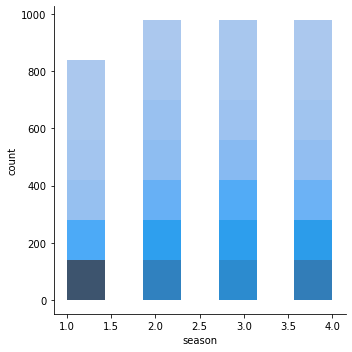

In [109]:
sns.displot(train, x="season", y="count", bins=7)

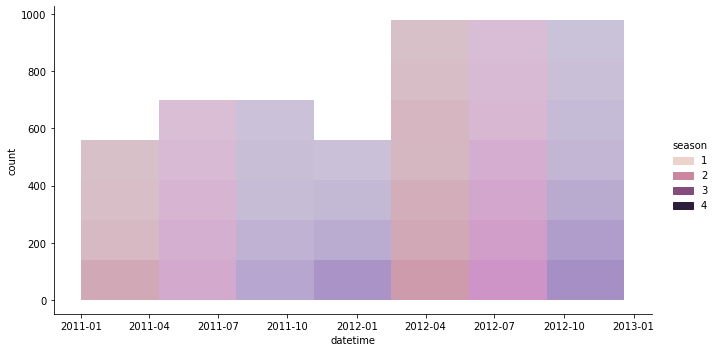

In [110]:
sns.displot(train, x="datetime", y="count", hue="season", bins=7, height=5, aspect=15/8)

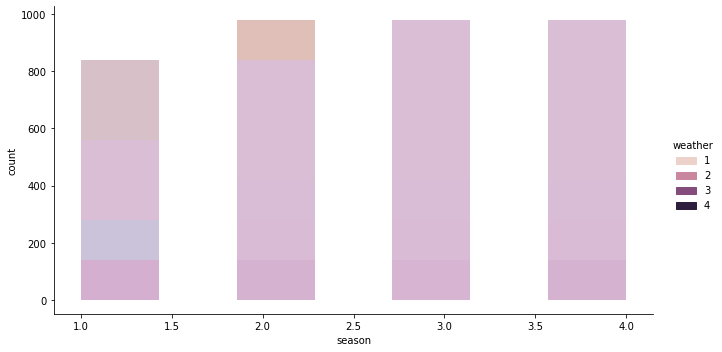

In [111]:
sns.displot(train, x="season", y="count", hue="weather", bins=7, height=5, aspect=15/8)

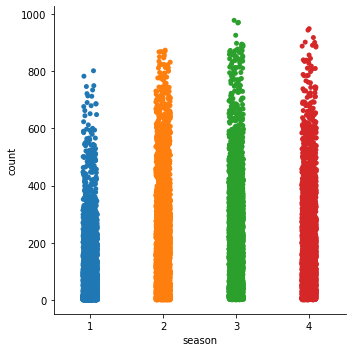

In [112]:
sns.catplot(x="season", y="count", data=train)

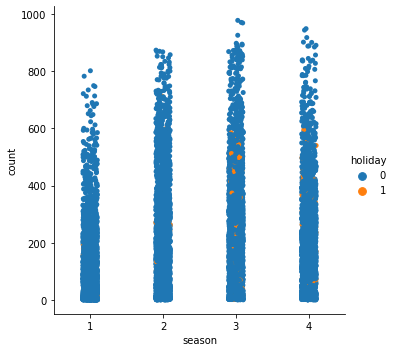

In [113]:
sns.catplot(x="season", y="count", hue="holiday", data=train)

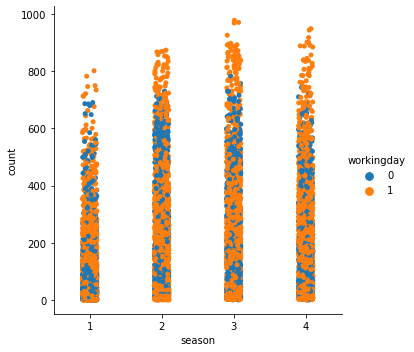

In [114]:
sns.catplot(x="season", y="count", hue="workingday", data=train)

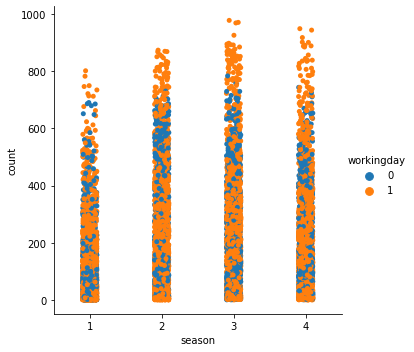

In [115]:
sns.catplot(x="season", y="count", hue="workingday", data=train)

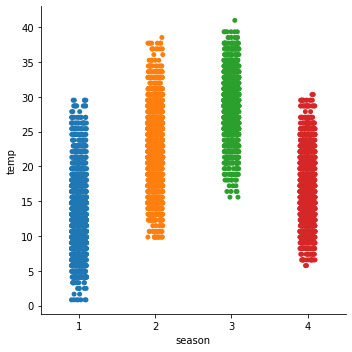

In [116]:
sns.catplot(x="season", y="temp", data=train)

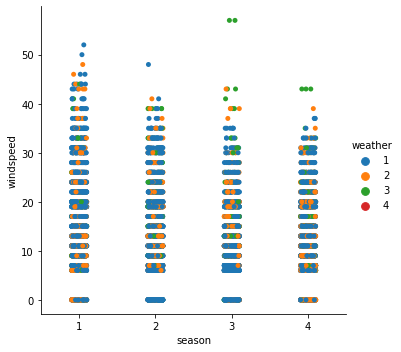

In [117]:
sns.catplot(x="season", y="windspeed", hue="weather", data=train)

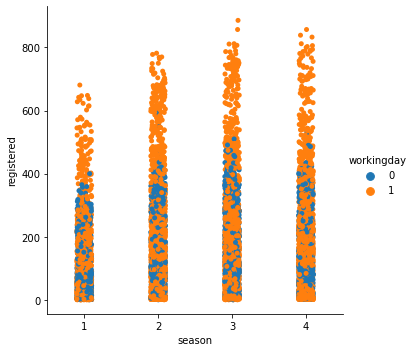

In [118]:
sns.catplot(x="season", y="registered", hue="workingday", data=train)

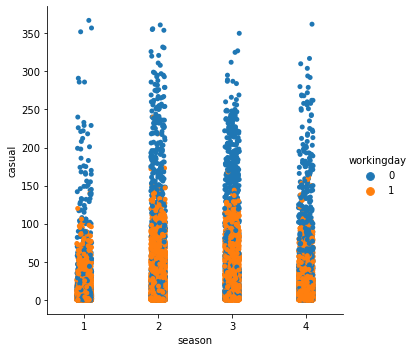

In [119]:
sns.catplot(x="season", y="casual", hue="workingday", data=train)

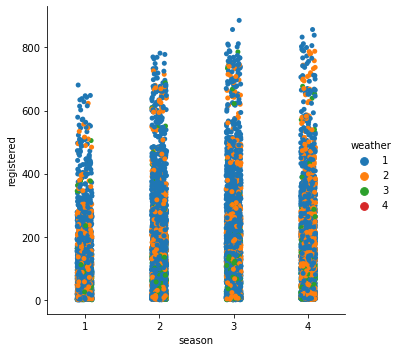

In [120]:
sns.catplot(x="season", y="registered", hue="weather", data=train)

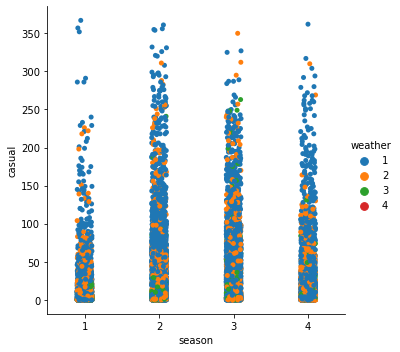

In [121]:
sns.catplot(x="season", y="casual", hue="weather", data=train)

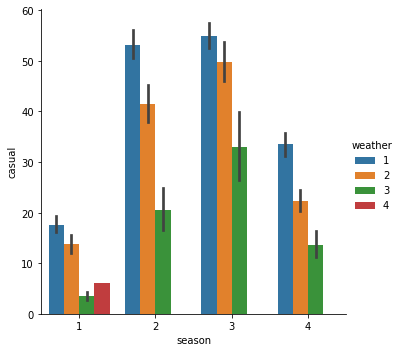

In [122]:
sns.catplot(x="season", y="casual", hue="weather", kind="bar", data=train)

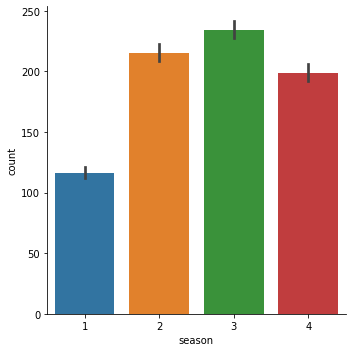

In [123]:
sns.catplot(x="season", y="count", kind="bar", data=train)

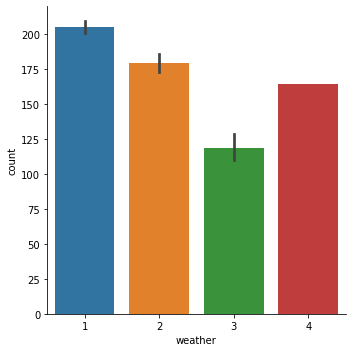

In [124]:
sns.catplot(x="weather", y="count", kind="bar", data=train)

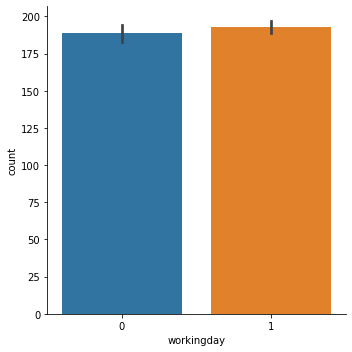

In [125]:
sns.catplot(x="workingday", y="count", kind="bar", data=train)

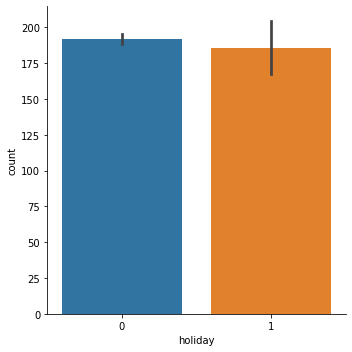

In [126]:
sns.catplot(x="holiday", y="count", kind="bar", data=train)

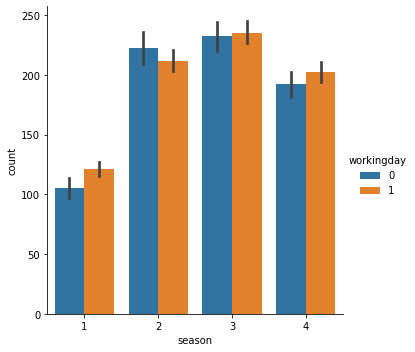

In [127]:
sns.catplot(x="season", y="count", hue="workingday", kind="bar", data=train)

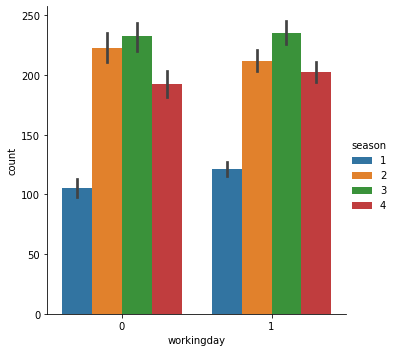

In [128]:
sns.catplot(x="workingday", y="count", hue="season", kind="bar", data=train)

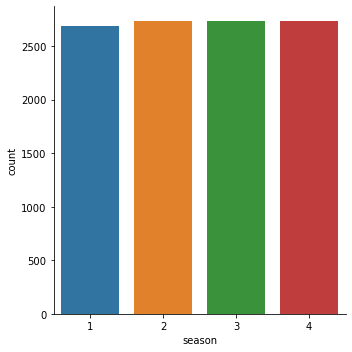

In [129]:
sns.catplot(kind="count", data=train, x="season")

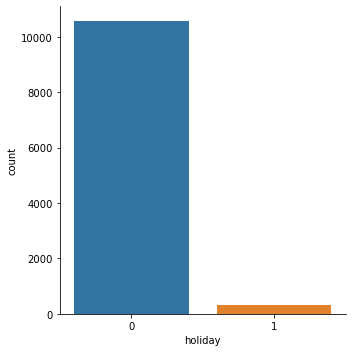

In [130]:
sns.catplot(kind="count", data=train, x="holiday")

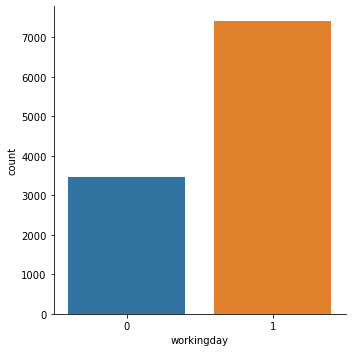

In [131]:
sns.catplot(kind="count", data=train, x="workingday")

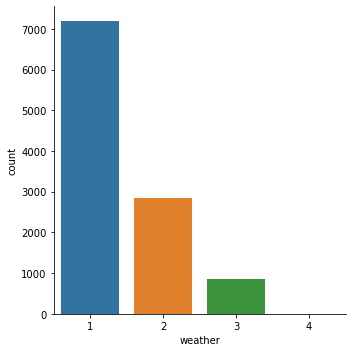

In [132]:
sns.catplot(kind="count", data=train, x="weather")

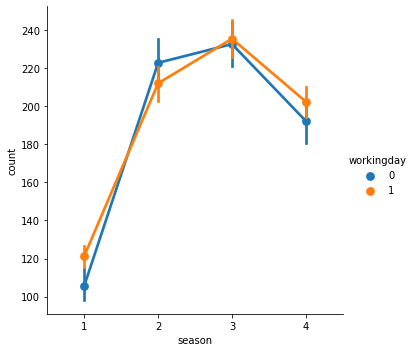

In [133]:
sns.catplot(kind="point", data=train, x="season", y="count", hue="workingday")

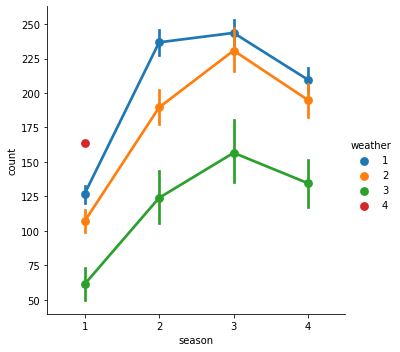

In [134]:
sns.catplot(kind="point", data=train, x="season", y="count", hue="weather")

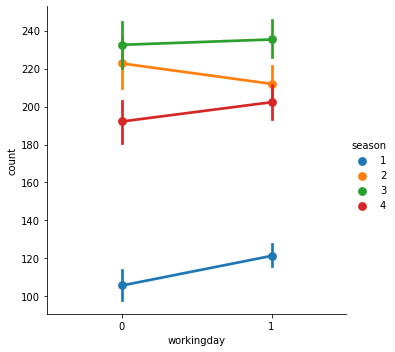

In [135]:
sns.catplot(kind="point", data=train, x="workingday", y="count", hue="season")

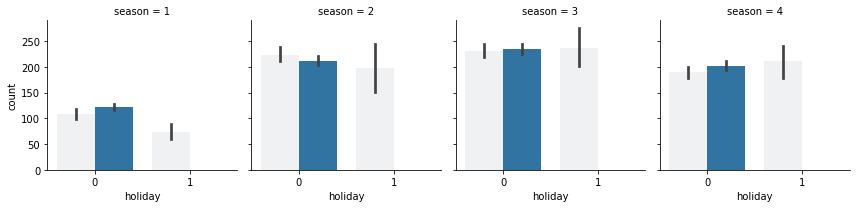

In [136]:
g = sns.FacetGrid(train, col="season")
g.map_dataframe(sns.barplot, x="holiday", y="count", hue="workingday")

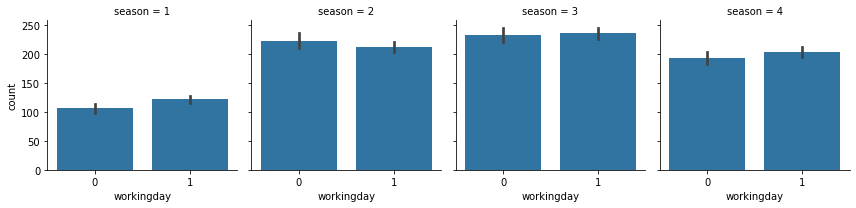

In [137]:
g = sns.FacetGrid(train, col="season")
g.map_dataframe(sns.barplot, x="workingday", y="count")

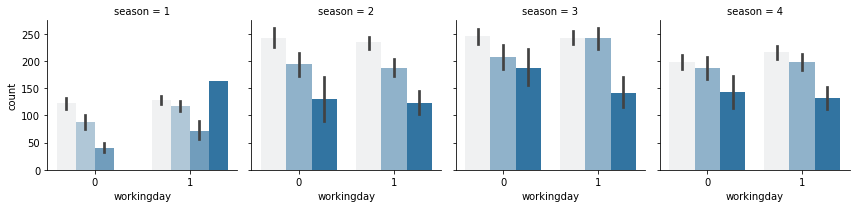

In [138]:
g = sns.FacetGrid(train, col="season")
g.map_dataframe(sns.barplot, x="workingday", y="count", hue="weather")

## Train your model (Regression)

<AxesSubplot:>

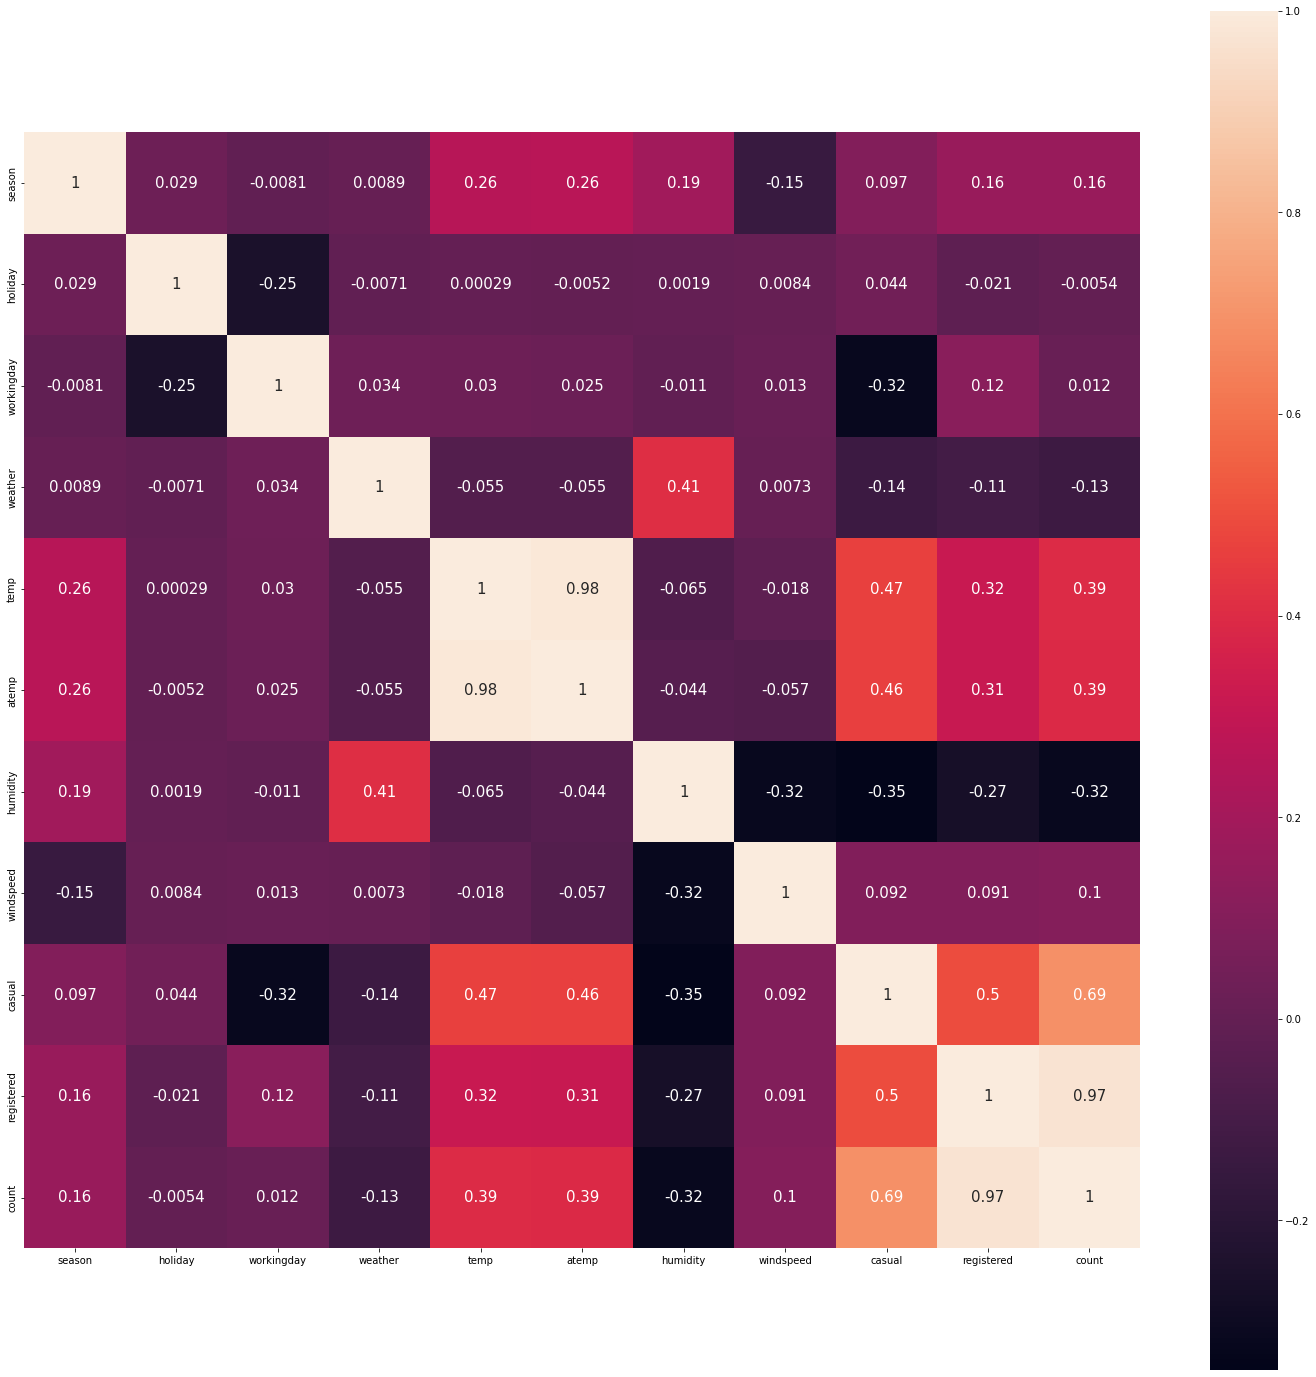

In [139]:
my_correlation = train.corr()
plt.figure(figsize=(25,25))
sns.heatmap(my_correlation,annot=True,  annot_kws={'size':15}, cbar=True, square= True)

In [140]:
train = pd.read_csv("train.csv")

In [141]:
train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1/1/2011 0:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,1/1/2011 1:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,1/1/2011 2:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,1/1/2011 3:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,1/1/2011 4:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,12/19/2012 19:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,12/19/2012 20:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,12/19/2012 21:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,12/19/2012 22:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [142]:
X = train[["workingday"]]
Y = train[["count"]]
x_train, x_test , y_train , y_test = train_test_split(X,Y,test_size=0.25, random_state=4)

In [143]:
lr_workingday = LinearRegression()
lr_workingday.fit(x_train, y_train)

LinearRegression()

In [144]:
print(lr_workingday.intercept_)
print(lr_workingday.coef_)

[189.1206764]
[[3.38669505]]


In [145]:
y_pred=lr_workingday.predict(x_test)

<AxesSubplot:ylabel='Count'>

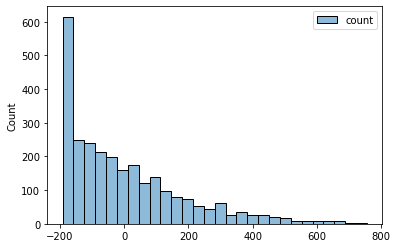

In [146]:
sns.histplot(y_test-y_pred)

In [147]:
print('R^2:',metrics.r2_score(y_test, y_pred))
print('MAE:',metrics.mean_absolute_error(y_test, y_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R^2: 0.0002599987497293732
MAE: 144.62491222454375
MSE: 33598.13645579532
RMSE: 183.29794449419043


In [148]:
X = train[["season"]]
Y = train[["count"]]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=5)

In [149]:
lr_season = LinearRegression()
lr_season.fit(X_train, Y_train)

LinearRegression()

In [150]:
print(lr_season.intercept_)
print(lr_season.coef_)

[124.76653662]
[[26.85597429]]


In [151]:
Y_pred = lr_season.predict(X_test)

<AxesSubplot:ylabel='Count'>

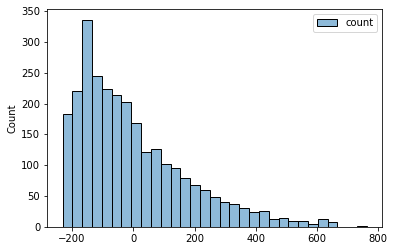

In [152]:
sns.histplot(Y_test-Y_pred)

In [153]:
print('R^2:',metrics.r2_score(Y_test, Y_pred))
print('MAE:',metrics.mean_absolute_error(Y_test, Y_pred))
print('MSE:',metrics.mean_squared_error(Y_test, Y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))

R^2: 0.024828494274245827
MAE: 141.12172341650032
MSE: 32005.69603102699
RMSE: 178.9013583822856


In [154]:
X = train[["temp"]]
Y = train[["count"]]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=6)

In [155]:
lr_temp = LinearRegression()
lr_temp.fit(X_train, Y_train)

LinearRegression()

In [156]:
print(lr_temp.intercept_)
print(lr_temp.coef_)

[9.06609296]
[[9.07414187]]


In [157]:
Y_pred = lr_temp.predict(X_test)

<AxesSubplot:ylabel='Count'>

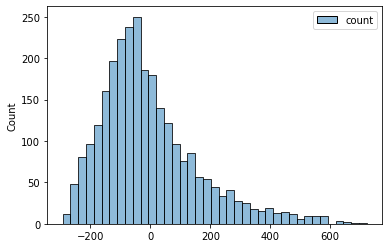

In [158]:
sns.histplot(Y_test-Y_pred)

In [159]:
print('R^2:',metrics.r2_score(Y_test, Y_pred))
print('MAE:',metrics.mean_absolute_error(Y_test, Y_pred))
print('MSE:',metrics.mean_squared_error(Y_test, Y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))

R^2: 0.16333566167221591
MAE: 125.36887478455743
MSE: 27051.213743966546
RMSE: 164.47253188288477


In [160]:
X = train[["humidity"]]
Y = train[["count"]]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=6)

In [161]:
lr_humidity = LinearRegression()
lr_humidity.fit(X_train, Y_train)

LinearRegression()

In [162]:
print(lr_humidity.intercept_)
print(lr_humidity.coef_)

[381.60454305]
[[-3.05699263]]


In [163]:
Y_pred = lr_humidity.predict(X_test)

<AxesSubplot:ylabel='Count'>

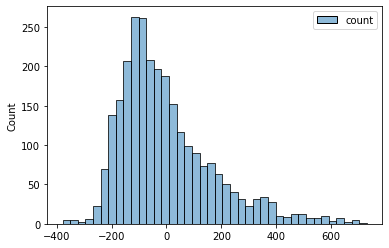

In [164]:
sns.histplot(Y_test-Y_pred)

In [165]:
print('R^2:',metrics.r2_score(Y_test, Y_pred))
print('MAE:',metrics.mean_absolute_error(Y_test, Y_pred))
print('MSE:',metrics.mean_squared_error(Y_test, Y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))

R^2: 0.0904255701292932
MAE: 131.80220191241744
MSE: 29408.558715023588
RMSE: 171.4892378985445


In [166]:
X = train[["registered"]]
Y = train[["count"]]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=6)

In [167]:
lr_registered = LinearRegression()
lr_registered.fit(X_train, Y_train)

LinearRegression()

In [168]:
print(lr_registered.intercept_)
print(lr_registered.coef_)

[10.46419904]
[[1.16516309]]


In [169]:
Y_pred = lr_registered.predict(X_test)

<AxesSubplot:ylabel='Count'>

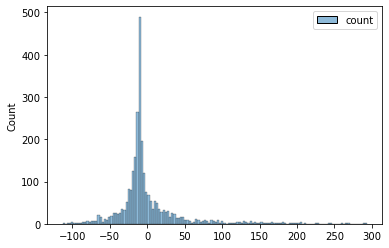

In [170]:
sns.histplot(Y_test-Y_pred)

In [171]:
print('R^2:',metrics.r2_score(Y_test, Y_pred))
print('MAE:',metrics.mean_absolute_error(Y_test, Y_pred))
print('MSE:',metrics.mean_squared_error(Y_test, Y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))

R^2: 0.9423230596924508
MAE: 26.43701528982986
MSE: 1864.82340513748
RMSE: 43.18360111358801


In [172]:
X = train[["windspeed"]]
Y = train[["count"]]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=6)

In [173]:
lr_windspeed = LinearRegression()
lr_windspeed.fit(X_train, Y_train)

LinearRegression()

In [174]:
print(lr_windspeed.intercept_)
print(lr_windspeed.coef_)

[161.8126577]
[[2.42653714]]


In [175]:
Y_pred = lr_windspeed.predict(X_test)

<AxesSubplot:ylabel='Count'>

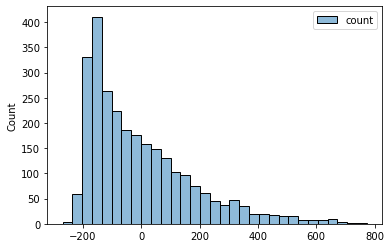

In [176]:
sns.histplot(Y_test-Y_pred)

In [177]:
print('R^2:',metrics.r2_score(Y_test, Y_pred))
print('MAE:',metrics.mean_absolute_error(Y_test, Y_pred))
print('MSE:',metrics.mean_squared_error(Y_test, Y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))

R^2: 0.004208554343856141
MAE: 142.5174720861648
MSE: 32196.14606103172
RMSE: 179.43284554682768


In [178]:
train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1/1/2011 0:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,1/1/2011 1:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,1/1/2011 2:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,1/1/2011 3:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,1/1/2011 4:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,12/19/2012 19:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,12/19/2012 20:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,12/19/2012 21:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,12/19/2012 22:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [179]:
X = train.drop(['casual', 'registered', 'count', 'datetime'], axis=1)
Y = train[["count"]]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=6)

In [180]:
lr_multiple = LinearRegression()
lr_multiple.fit(X_train, Y_train)

LinearRegression()

In [181]:
print(lr_multiple.intercept_)
print(lr_multiple.coef_)

[136.85294221]
[[24.1185994  -7.80294338 -2.11082531  7.55141744  0.49545627  6.7806534
  -3.17002936  0.89667915]]


In [182]:
Y_pred = lr_multiple.predict(X_test)

<AxesSubplot:ylabel='Count'>

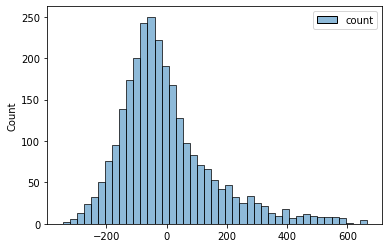

In [183]:
sns.histplot(Y_test-Y_pred)

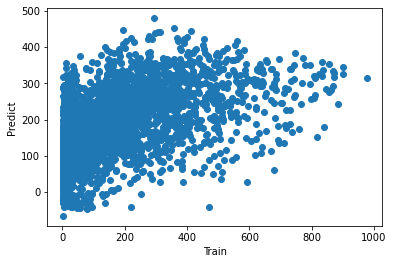

In [184]:
plt.scatter(Y_test, Y_pred)
plt.xlabel("Train")
plt.ylabel("Predict")
plt.show()

In [185]:
print('R^2:',metrics.r2_score(Y_test, Y_pred))
print('MAE:',metrics.mean_absolute_error(Y_test, Y_pred))
print('MSE:',metrics.mean_squared_error(Y_test, Y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))

R^2: 0.24644293174147713
MAE: 116.07377126443515
MSE: 24364.171374245787
RMSE: 156.09026675051135


In [186]:
X = train.drop(['count', 'datetime'], axis=1)
Y = train[["count"]]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=6)

In [187]:
lr_multiple2 = LinearRegression()
lr_multiple2.fit(X_train, Y_train)

LinearRegression()

In [188]:
print(lr_multiple2.intercept_)
print(lr_multiple2.coef_)

[8.52651283e-14]
[[-2.26588584e-15  2.80480193e-13 -1.06878522e-14  1.55823015e-14
  -3.82230068e-15  3.44837272e-15 -1.19702658e-15  3.47767337e-16
   1.00000000e+00  1.00000000e+00]]


In [189]:
Y_pred = lr_multiple2.predict(X_test)

<AxesSubplot:ylabel='Count'>

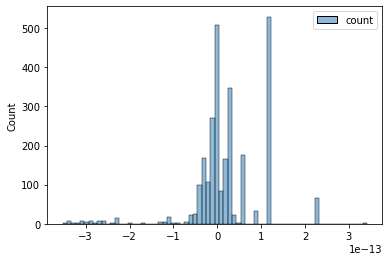

In [190]:
sns.histplot(Y_test-Y_pred)

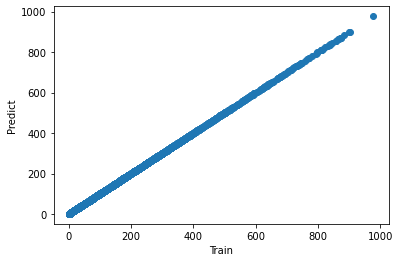

In [191]:
plt.scatter(Y_test, Y_pred)
plt.xlabel("Train")
plt.ylabel("Predict")
plt.show()

In [192]:
print('R^2:',metrics.r2_score(Y_test, Y_pred))
print('MAE:',metrics.mean_absolute_error(Y_test, Y_pred))
print('MSE:',metrics.mean_squared_error(Y_test, Y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))

R^2: 1.0
MAE: 5.1850311129302243e-14
MSE: 6.461350980273897e-27
RMSE: 8.038252907363575e-14


In [193]:
X = train.drop(['casual', 'registered', 'count', 'datetime'], axis=1)
Y = train[["count"]]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=6)
poly_features = PolynomialFeatures(degree=2)
X_train_quadratic = poly_features.fit_transform(X_train)
quadratic = LinearRegression()
quadratic.fit(X_train_quadratic, y_train)
Y_pred = quadratic.predict(poly_features.fit_transform(X_test))

In [194]:
print('R^2:',metrics.r2_score(Y_test, Y_pred))
print('MAE:',metrics.mean_absolute_error(Y_test, Y_pred))
print('MSE:',metrics.mean_squared_error(Y_test, Y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))

R^2: -0.014323239601052418
MAE: 143.3979690835405
MSE: 32795.32006199944
RMSE: 181.09478198446095


In [195]:
X = train.drop(['count', 'datetime'], axis=1)
Y = train[["count"]]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=6)
poly_features = PolynomialFeatures(degree=2)
X_train_quadratic = poly_features.fit_transform(X_train)
quadratic = LinearRegression()
quadratic.fit(X_train_quadratic, y_train)
Y_pred = quadratic.predict(poly_features.fit_transform(X_test))

In [196]:
print('R^2:',metrics.r2_score(Y_test, Y_pred))
print('MAE:',metrics.mean_absolute_error(Y_test, Y_pred))
print('MSE:',metrics.mean_squared_error(Y_test, Y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))

R^2: -0.03299386959798967
MAE: 144.673680256785
MSE: 33398.98294046168
RMSE: 182.75388625269144


In [197]:
train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1/1/2011 0:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,1/1/2011 1:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,1/1/2011 2:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,1/1/2011 3:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,1/1/2011 4:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,12/19/2012 19:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,12/19/2012 20:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,12/19/2012 21:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,12/19/2012 22:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [198]:
X = train.drop(['season', 'datetime'], axis=1)
y = train['season']

In [199]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [200]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

C:\Users\Laptopkaran\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [201]:
y_pred = logreg.predict(X_test)

In [202]:
y_test

3650     3
8909     3
4623     4
8818     3
1640     2
        ..
6790     2
2329     2
6734     1
281      1
10851    4
Name: season, Length: 2178, dtype: int64

In [203]:
y_pred

array([3, 3, 2, ..., 2, 1, 2], dtype=int64)

In [204]:
metrics.confusion_matrix(y_test, y_pred)

array([[287,  56,  43, 166],
       [ 47, 146, 197, 125],
       [  8,  99, 405,  41],
       [134,  84,  42, 298]], dtype=int64)

In [205]:
metrics.accuracy_score(y_test, y_pred)

0.5215794306703397

In [206]:
metrics.recall_score(y_test, y_pred, average=None)

array([0.51992754, 0.28349515, 0.7323689 , 0.53405018])

In [207]:
sum(metrics.recall_score(y_test, y_pred, average=None))/4

0.5174604395000701

In [208]:
metrics.precision_score(y_test, y_pred, average=None)

array([0.60294118, 0.37922078, 0.58951965, 0.47301587])

In [209]:
sum(metrics.precision_score(y_test, y_pred, average=None))/4

0.5111743698405656

In [210]:
metrics.f1_score(y_test, y_pred, average=None)

array([0.55836576, 0.32444444, 0.65322581, 0.5016835 ])

In [211]:
sum(metrics.f1_score(y_test, y_pred, average=None))/4

0.5094298778336057

In [212]:
X = train.drop(['season', 'datetime', 'casual', 'registered', 'count'], axis=1)
y = train['season']

In [213]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [214]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

C:\Users\Laptopkaran\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [215]:
y_pred = logreg.predict(X_test)

In [216]:
metrics.confusion_matrix(y_test, y_pred)

array([[397,  43,  10, 114],
       [ 74, 165, 184, 131],
       [  0,  82, 447,  20],
       [163,  78,  41, 229]], dtype=int64)

In [217]:
metrics.accuracy_score(y_test, y_pred)

0.5684113865932048

In [218]:
metrics.recall_score(y_test, y_pred, average=None)

array([0.70390071, 0.29783394, 0.81420765, 0.4481409 ])

In [219]:
sum(metrics.recall_score(y_test, y_pred, average=None))/4

0.5660207986767068

In [220]:
metrics.precision_score(y_test, y_pred, average=None)

array([0.62618297, 0.44836957, 0.65542522, 0.46356275])

In [221]:
sum(metrics.precision_score(y_test, y_pred, average=None))/4

0.5483851258737155

In [222]:
metrics.f1_score(y_test, y_pred, average=None)

array([0.66277129, 0.35791757, 0.72623883, 0.45572139])

In [223]:
sum(metrics.f1_score(y_test, y_pred, average=None))/4

0.550662269807217

## Test Result

In [224]:
#Result based on Multivariable Linear Reg

In [225]:
test = pd.read_csv("test.csv")

In [226]:
test

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014
...,...,...,...,...,...,...,...,...,...
6488,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014
6489,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014
6490,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014
6491,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981


In [227]:
X = test.drop(['datetime'], axis=1)
Y = lr_multiple.predict(X)

In [228]:
test['count'] = Y.astype(int)

In [229]:
test

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,94
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,86
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,86
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,91
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,91
...,...,...,...,...,...,...,...,...,...,...
6488,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014,86
6489,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014,86
6490,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014,78
6491,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981,94


## Send us the Result (Maktabkhoone)